# 2. Example: Pytorch Recurrent Neural Network


In [97]:
import torch
from dabench import data, vector, model
import matplotlib.pyplot as plt
import numpy as np

### Part I: Define torch model


In [98]:
n_vars = 3
n_hidden = 24
out_size = 3

In [99]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

rnn = RNN(n_vars, n_hidden, out_size)


In [100]:
loss_fn = torch.nn.MSELoss()
learning_rate = 0.001
optimiser = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

### Part II: Generate data and train

In [101]:
l63 = data.Lorenz63()

In [102]:
l63.generate(n_steps=1000)

In [103]:
train = torch.Tensor(l63.values[:600])
val = torch.Tensor(l63.values[600:800])
test = torch.Tensor(l63.values[800:])

In [104]:
import time
import math

num_epochs = 20000
print_every = 10


for t in range(num_epochs):
    all_train_pred = []
    all_val_pred = []
    
    # Init hidden state
    hidden = rnn.initHidden()
    
    # Clear stored grad
    optimiser.zero_grad()
    
    # Train iter
    output = train[None, 0]
    all_train_pred.append(output.view(-1))
    for i in range(train.shape[0]-1):
        # Predict
        output, hidden = rnn(output, hidden)
        all_train_pred.append(output.view(-1))
        
    all_train_pred_tensor = torch.cat(all_train_pred, dim=-1)

    # Calc loss
    loss = loss_fn(all_train_pred_tensor, train.flatten())

    # Validation: predict and calc loss
    output = val[None, 0]
    all_val_pred.append(output.view(-1))
    for j in range(val.shape[0]-1):
        output, hidden = rnn(output, hidden)
        all_val_pred.append(output.view(-1))
    all_val_pred_tensor = torch.cat(all_val_pred, dim=-1)
    val_loss = loss_fn(all_val_pred_tensor, val.flatten())

    # Backward pass
    loss.backward()
    
    # Update params
    optimiser.step()
    
    if t % print_every == 0:
        print('Epoch: {}, Train Loss: {}, Val Loss: {}'.format(t, loss.item(), val_loss.item()))


Epoch: 0, Train Loss: 253.82803344726562, Val Loss: 269.017333984375
Epoch: 10, Train Loss: 251.89830017089844, Val Loss: 267.1138916015625
Epoch: 20, Train Loss: 248.9468994140625, Val Loss: 264.2115478515625
Epoch: 30, Train Loss: 230.87149047851562, Val Loss: 246.45416259765625
Epoch: 40, Train Loss: 224.32139587402344, Val Loss: 239.99624633789062
Epoch: 50, Train Loss: 229.13031005859375, Val Loss: 244.69801330566406
Epoch: 60, Train Loss: 225.9296112060547, Val Loss: 241.5284881591797
Epoch: 70, Train Loss: 216.8329620361328, Val Loss: 232.5286407470703
Epoch: 80, Train Loss: 179.08407592773438, Val Loss: 195.06581115722656
Epoch: 90, Train Loss: 208.2964630126953, Val Loss: 224.012939453125
Epoch: 100, Train Loss: 219.93666076660156, Val Loss: 235.54721069335938
Epoch: 110, Train Loss: 218.9818878173828, Val Loss: 234.60533142089844
Epoch: 120, Train Loss: 214.20477294921875, Val Loss: 229.87721252441406
Epoch: 130, Train Loss: 204.9779815673828, Val Loss: 220.73023986816406
Epo

Epoch: 1160, Train Loss: 71.93293762207031, Val Loss: 88.9098892211914
Epoch: 1170, Train Loss: 71.89283752441406, Val Loss: 88.90133666992188
Epoch: 1180, Train Loss: 71.85303497314453, Val Loss: 88.89322662353516
Epoch: 1190, Train Loss: 71.81352996826172, Val Loss: 88.8855209350586
Epoch: 1200, Train Loss: 71.77430725097656, Val Loss: 88.87818908691406
Epoch: 1210, Train Loss: 71.73535919189453, Val Loss: 88.87132263183594
Epoch: 1220, Train Loss: 71.69669342041016, Val Loss: 88.86483001708984
Epoch: 1230, Train Loss: 71.65830993652344, Val Loss: 88.85871887207031
Epoch: 1240, Train Loss: 71.62018585205078, Val Loss: 88.8530044555664
Epoch: 1250, Train Loss: 71.58234405517578, Val Loss: 88.84769439697266
Epoch: 1260, Train Loss: 71.54474639892578, Val Loss: 88.8427505493164
Epoch: 1270, Train Loss: 71.50741577148438, Val Loss: 88.83820343017578
Epoch: 1280, Train Loss: 71.47032928466797, Val Loss: 88.83399963378906
Epoch: 1290, Train Loss: 71.43348693847656, Val Loss: 88.83019256591

Epoch: 2310, Train Loss: 69.98648071289062, Val Loss: 88.73846435546875
Epoch: 2320, Train Loss: 69.97457122802734, Val Loss: 88.74053192138672
Epoch: 2330, Train Loss: 69.96267700195312, Val Loss: 88.74270629882812
Epoch: 2340, Train Loss: 69.95074462890625, Val Loss: 88.74500274658203
Epoch: 2350, Train Loss: 69.93880462646484, Val Loss: 88.7474136352539
Epoch: 2360, Train Loss: 69.92683410644531, Val Loss: 88.74990844726562
Epoch: 2370, Train Loss: 69.91482543945312, Val Loss: 88.75247955322266
Epoch: 2380, Train Loss: 69.90276336669922, Val Loss: 88.75517272949219
Epoch: 2390, Train Loss: 69.89063262939453, Val Loss: 88.75794219970703
Epoch: 2400, Train Loss: 69.8784408569336, Val Loss: 88.76078033447266
Epoch: 2410, Train Loss: 69.86614990234375, Val Loss: 88.7636947631836
Epoch: 2420, Train Loss: 69.85377502441406, Val Loss: 88.76670837402344
Epoch: 2430, Train Loss: 69.84127807617188, Val Loss: 88.76974487304688
Epoch: 2440, Train Loss: 69.82865905761719, Val Loss: 88.7728500366

Epoch: 3460, Train Loss: 73.53974151611328, Val Loss: 90.25872039794922
Epoch: 3470, Train Loss: 73.09608459472656, Val Loss: 89.68948364257812
Epoch: 3480, Train Loss: 72.83393859863281, Val Loss: 89.36092376708984
Epoch: 3490, Train Loss: 72.67440795898438, Val Loss: 89.13172912597656
Epoch: 3500, Train Loss: 72.57341766357422, Val Loss: 88.99259948730469
Epoch: 3510, Train Loss: 72.50657653808594, Val Loss: 88.89028930664062
Epoch: 3520, Train Loss: 72.45976257324219, Val Loss: 88.8237533569336
Epoch: 3530, Train Loss: 72.42501068115234, Val Loss: 88.77310180664062
Epoch: 3540, Train Loss: 72.39761352539062, Val Loss: 88.73767852783203
Epoch: 3550, Train Loss: 72.3748550415039, Val Loss: 88.71001434326172
Epoch: 3560, Train Loss: 72.35501861572266, Val Loss: 88.6893081665039
Epoch: 3570, Train Loss: 72.33708190917969, Val Loss: 88.67272186279297
Epoch: 3580, Train Loss: 72.32038879394531, Val Loss: 88.6595687866211
Epoch: 3590, Train Loss: 72.30453491210938, Val Loss: 88.64867401123

Epoch: 4610, Train Loss: 70.86915588378906, Val Loss: 88.38313293457031
Epoch: 4620, Train Loss: 70.85443115234375, Val Loss: 88.38179779052734
Epoch: 4630, Train Loss: 70.83968353271484, Val Loss: 88.38047790527344
Epoch: 4640, Train Loss: 70.82491302490234, Val Loss: 88.37918090820312
Epoch: 4650, Train Loss: 70.81011962890625, Val Loss: 88.3779067993164
Epoch: 4660, Train Loss: 70.79529571533203, Val Loss: 88.37664794921875
Epoch: 4670, Train Loss: 70.78045654296875, Val Loss: 88.37540435791016
Epoch: 4680, Train Loss: 70.76559448242188, Val Loss: 88.37419128417969
Epoch: 4690, Train Loss: 70.7507095336914, Val Loss: 88.37299346923828
Epoch: 4700, Train Loss: 70.73580169677734, Val Loss: 88.37184143066406
Epoch: 4710, Train Loss: 70.72087860107422, Val Loss: 88.37068176269531
Epoch: 4720, Train Loss: 70.70594787597656, Val Loss: 88.36956024169922
Epoch: 4730, Train Loss: 70.69098663330078, Val Loss: 88.36845397949219
Epoch: 4740, Train Loss: 70.67601776123047, Val Loss: 88.367378234

Epoch: 5760, Train Loss: 69.7977066040039, Val Loss: 88.46546173095703
Epoch: 5770, Train Loss: 69.79264068603516, Val Loss: 88.46817779541016
Epoch: 5780, Train Loss: 69.78749084472656, Val Loss: 88.470947265625
Epoch: 5790, Train Loss: 69.7822494506836, Val Loss: 88.4737548828125
Epoch: 5800, Train Loss: 69.77690124511719, Val Loss: 88.4765396118164
Epoch: 5810, Train Loss: 69.77144622802734, Val Loss: 88.47940063476562
Epoch: 5820, Train Loss: 69.76589965820312, Val Loss: 88.4822769165039
Epoch: 5830, Train Loss: 69.76026153564453, Val Loss: 88.48519897460938
Epoch: 5840, Train Loss: 69.75450897216797, Val Loss: 88.48814392089844
Epoch: 5850, Train Loss: 69.74864959716797, Val Loss: 88.49111938476562
Epoch: 5860, Train Loss: 69.74267578125, Val Loss: 88.494140625
Epoch: 5870, Train Loss: 69.7365951538086, Val Loss: 88.4971923828125
Epoch: 5880, Train Loss: 69.73041534423828, Val Loss: 88.50027465820312
Epoch: 5890, Train Loss: 69.72411346435547, Val Loss: 88.5033950805664
Epoch: 590

Epoch: 6910, Train Loss: 70.62354278564453, Val Loss: 88.45781707763672
Epoch: 6920, Train Loss: 70.58441925048828, Val Loss: 88.45443725585938
Epoch: 6930, Train Loss: 70.54476165771484, Val Loss: 88.45109558105469
Epoch: 6940, Train Loss: 70.50454711914062, Val Loss: 88.4477767944336
Epoch: 6950, Train Loss: 70.46378326416016, Val Loss: 88.44450378417969
Epoch: 6960, Train Loss: 70.42244720458984, Val Loss: 88.44129180908203
Epoch: 6970, Train Loss: 70.38056182861328, Val Loss: 88.43810272216797
Epoch: 6980, Train Loss: 70.33811950683594, Val Loss: 88.43498992919922
Epoch: 6990, Train Loss: 70.29512786865234, Val Loss: 88.43191528320312
Epoch: 7000, Train Loss: 70.25162506103516, Val Loss: 88.42887878417969
Epoch: 7010, Train Loss: 70.2076416015625, Val Loss: 88.42593383789062
Epoch: 7020, Train Loss: 70.1632080078125, Val Loss: 88.42304992675781
Epoch: 7030, Train Loss: 70.118408203125, Val Loss: 88.42023468017578
Epoch: 7040, Train Loss: 70.07331085205078, Val Loss: 88.417510986328

Epoch: 8060, Train Loss: 74.2357177734375, Val Loss: 89.68834686279297
Epoch: 8070, Train Loss: 74.15335083007812, Val Loss: 89.58445739746094
Epoch: 8080, Train Loss: 74.08171844482422, Val Loss: 89.49714660644531
Epoch: 8090, Train Loss: 74.01892852783203, Val Loss: 89.41978454589844
Epoch: 8100, Train Loss: 73.96346282958984, Val Loss: 89.35299682617188
Epoch: 8110, Train Loss: 73.9140625, Val Loss: 89.29400634765625
Epoch: 8120, Train Loss: 73.86971282958984, Val Loss: 89.24226379394531
Epoch: 8130, Train Loss: 73.8295669555664, Val Loss: 89.19639587402344
Epoch: 8140, Train Loss: 73.79293060302734, Val Loss: 89.15572357177734
Epoch: 8150, Train Loss: 73.75923919677734, Val Loss: 89.11941528320312
Epoch: 8160, Train Loss: 73.72799682617188, Val Loss: 89.0869140625
Epoch: 8170, Train Loss: 73.69881439208984, Val Loss: 89.05770111083984
Epoch: 8180, Train Loss: 73.67135620117188, Val Loss: 89.03128051757812
Epoch: 8190, Train Loss: 73.64533996582031, Val Loss: 89.0073471069336
Epoch:

Epoch: 9210, Train Loss: 71.88806915283203, Val Loss: 88.41698455810547
Epoch: 9220, Train Loss: 71.87250518798828, Val Loss: 88.41439819335938
Epoch: 9230, Train Loss: 71.85697174072266, Val Loss: 88.41184997558594
Epoch: 9240, Train Loss: 71.8414306640625, Val Loss: 88.40935516357422
Epoch: 9250, Train Loss: 71.8259048461914, Val Loss: 88.40689086914062
Epoch: 9260, Train Loss: 71.8104019165039, Val Loss: 88.40446472167969
Epoch: 9270, Train Loss: 71.79490661621094, Val Loss: 88.40208435058594
Epoch: 9280, Train Loss: 71.77942657470703, Val Loss: 88.39974212646484
Epoch: 9290, Train Loss: 71.76396179199219, Val Loss: 88.39745330810547
Epoch: 9300, Train Loss: 71.74850463867188, Val Loss: 88.39521789550781
Epoch: 9310, Train Loss: 71.7330551147461, Val Loss: 88.39302062988281
Epoch: 9320, Train Loss: 71.71762084960938, Val Loss: 88.39086151123047
Epoch: 9330, Train Loss: 71.70219421386719, Val Loss: 88.38874816894531
Epoch: 9340, Train Loss: 71.68678283691406, Val Loss: 88.38667297363

Epoch: 10360, Train Loss: 70.23821258544922, Val Loss: 88.62626647949219
Epoch: 10370, Train Loss: 70.22819519042969, Val Loss: 88.6363525390625
Epoch: 10380, Train Loss: 70.21834564208984, Val Loss: 88.64663696289062
Epoch: 10390, Train Loss: 70.20867156982422, Val Loss: 88.65709686279297
Epoch: 10400, Train Loss: 70.19918060302734, Val Loss: 88.66776275634766
Epoch: 10410, Train Loss: 70.18987274169922, Val Loss: 88.67860412597656
Epoch: 10420, Train Loss: 70.18074035644531, Val Loss: 88.68962097167969
Epoch: 10430, Train Loss: 70.1717758178711, Val Loss: 88.7008056640625
Epoch: 10440, Train Loss: 70.16299438476562, Val Loss: 88.71216583251953
Epoch: 10450, Train Loss: 70.15438079833984, Val Loss: 88.72368621826172
Epoch: 10460, Train Loss: 70.14593505859375, Val Loss: 88.73535919189453
Epoch: 10470, Train Loss: 70.13764190673828, Val Loss: 88.7471694946289
Epoch: 10480, Train Loss: 70.1295166015625, Val Loss: 88.75911712646484
Epoch: 10490, Train Loss: 70.12153625488281, Val Loss: 8

Epoch: 11490, Train Loss: 69.07984161376953, Val Loss: 88.53849029541016
Epoch: 11500, Train Loss: 68.98848724365234, Val Loss: 88.52909851074219
Epoch: 11510, Train Loss: 68.90878295898438, Val Loss: 88.53677368164062
Epoch: 11520, Train Loss: 68.81977844238281, Val Loss: 88.48080444335938
Epoch: 11530, Train Loss: 68.77222442626953, Val Loss: 88.44029998779297
Epoch: 11540, Train Loss: 68.7096939086914, Val Loss: 88.37989807128906
Epoch: 11550, Train Loss: 68.65137481689453, Val Loss: 88.28363800048828
Epoch: 11560, Train Loss: 68.59223175048828, Val Loss: 88.16505432128906
Epoch: 11570, Train Loss: 68.52999877929688, Val Loss: 88.014404296875
Epoch: 11580, Train Loss: 68.46405029296875, Val Loss: 87.83366394042969
Epoch: 11590, Train Loss: 68.39421081542969, Val Loss: 87.6163558959961
Epoch: 11600, Train Loss: 68.32118225097656, Val Loss: 87.3642578125
Epoch: 11610, Train Loss: 68.24678039550781, Val Loss: 87.07427978515625
Epoch: 11620, Train Loss: 68.17438507080078, Val Loss: 86.7

Epoch: 12620, Train Loss: 67.22240447998047, Val Loss: 82.89168548583984
Epoch: 12630, Train Loss: 67.20548248291016, Val Loss: 82.84619903564453
Epoch: 12640, Train Loss: 67.18812561035156, Val Loss: 82.79977416992188
Epoch: 12650, Train Loss: 67.17032623291016, Val Loss: 82.75183868408203
Epoch: 12660, Train Loss: 67.15206146240234, Val Loss: 82.70257568359375
Epoch: 12670, Train Loss: 67.13326263427734, Val Loss: 82.65203857421875
Epoch: 12680, Train Loss: 67.11395263671875, Val Loss: 82.59980773925781
Epoch: 12690, Train Loss: 67.09407043457031, Val Loss: 82.54606628417969
Epoch: 12700, Train Loss: 67.07357788085938, Val Loss: 82.49021911621094
Epoch: 12710, Train Loss: 67.05243682861328, Val Loss: 82.43248748779297
Epoch: 12720, Train Loss: 67.03059387207031, Val Loss: 82.37394714355469
Epoch: 12730, Train Loss: 67.00874328613281, Val Loss: 82.3427505493164
Epoch: 12740, Train Loss: 67.61710357666016, Val Loss: 83.81962585449219
Epoch: 12750, Train Loss: 66.99178314208984, Val Los

Epoch: 13760, Train Loss: 68.72787475585938, Val Loss: 88.40658569335938
Epoch: 13770, Train Loss: 68.66622924804688, Val Loss: 88.3739013671875
Epoch: 13780, Train Loss: 68.61687469482422, Val Loss: 88.32290649414062
Epoch: 13790, Train Loss: 68.57733154296875, Val Loss: 88.25422668457031
Epoch: 13800, Train Loss: 68.54316711425781, Val Loss: 88.17147827148438
Epoch: 13810, Train Loss: 68.50997161865234, Val Loss: 88.0794906616211
Epoch: 13820, Train Loss: 68.47460174560547, Val Loss: 87.98146057128906
Epoch: 13830, Train Loss: 68.43489837646484, Val Loss: 87.877197265625
Epoch: 13840, Train Loss: 68.38897705078125, Val Loss: 87.7633056640625
Epoch: 13850, Train Loss: 68.33453369140625, Val Loss: 87.63411712646484
Epoch: 13860, Train Loss: 68.2679672241211, Val Loss: 87.4822769165039
Epoch: 13870, Train Loss: 68.18338775634766, Val Loss: 87.2974853515625
Epoch: 13880, Train Loss: 68.07037353515625, Val Loss: 87.06304168701172
Epoch: 13890, Train Loss: 67.90918731689453, Val Loss: 86.7

Epoch: 14890, Train Loss: 62.8800048828125, Val Loss: 79.2863998413086
Epoch: 14900, Train Loss: 70.88169860839844, Val Loss: 88.11756896972656
Epoch: 14910, Train Loss: 68.88812255859375, Val Loss: 86.00057983398438
Epoch: 14920, Train Loss: 67.64425659179688, Val Loss: 86.52208709716797
Epoch: 14930, Train Loss: 67.05000305175781, Val Loss: 86.18952941894531
Epoch: 14940, Train Loss: 65.82847595214844, Val Loss: 84.39228820800781
Epoch: 14950, Train Loss: 63.21116638183594, Val Loss: 81.55428314208984
Epoch: 14960, Train Loss: 72.5794677734375, Val Loss: 90.03607940673828
Epoch: 14970, Train Loss: 70.19876861572266, Val Loss: 87.79737091064453
Epoch: 14980, Train Loss: 68.05377960205078, Val Loss: 86.89649200439453
Epoch: 14990, Train Loss: 68.12924194335938, Val Loss: 87.2505111694336
Epoch: 15000, Train Loss: 67.3983383178711, Val Loss: 86.24560546875
Epoch: 15010, Train Loss: 66.82862091064453, Val Loss: 85.63507843017578
Epoch: 15020, Train Loss: 65.98698425292969, Val Loss: 84.9

Epoch: 16020, Train Loss: 66.50523376464844, Val Loss: 85.66220092773438
Epoch: 16030, Train Loss: 65.9521713256836, Val Loss: 84.97350311279297
Epoch: 16040, Train Loss: 65.20535278320312, Val Loss: 83.79789733886719
Epoch: 16050, Train Loss: 63.99794387817383, Val Loss: 80.99296569824219
Epoch: 16060, Train Loss: 63.1957893371582, Val Loss: 79.91800689697266
Epoch: 16070, Train Loss: 62.454246520996094, Val Loss: 78.9677963256836
Epoch: 16080, Train Loss: 61.74116134643555, Val Loss: 78.95934295654297
Epoch: 16090, Train Loss: 61.02814483642578, Val Loss: 79.1461410522461
Epoch: 16100, Train Loss: 60.302188873291016, Val Loss: 78.84175872802734
Epoch: 16110, Train Loss: 59.60905456542969, Val Loss: 79.00786590576172
Epoch: 16120, Train Loss: 58.957923889160156, Val Loss: 79.05001831054688
Epoch: 16130, Train Loss: 58.72068405151367, Val Loss: 79.33605194091797
Epoch: 16140, Train Loss: 68.18160247802734, Val Loss: 85.6858139038086
Epoch: 16150, Train Loss: 65.87045288085938, Val Loss

Epoch: 17160, Train Loss: 68.17694854736328, Val Loss: 87.9163589477539
Epoch: 17170, Train Loss: 68.09524536132812, Val Loss: 87.8707046508789
Epoch: 17180, Train Loss: 68.01062774658203, Val Loss: 87.8151626586914
Epoch: 17190, Train Loss: 67.9219970703125, Val Loss: 87.74787139892578
Epoch: 17200, Train Loss: 67.82752227783203, Val Loss: 87.66658782958984
Epoch: 17210, Train Loss: 67.7243423461914, Val Loss: 87.56853485107422
Epoch: 17220, Train Loss: 67.60810852050781, Val Loss: 87.45015716552734
Epoch: 17230, Train Loss: 67.47248840332031, Val Loss: 87.30628967285156
Epoch: 17240, Train Loss: 67.30826568603516, Val Loss: 87.12918090820312
Epoch: 17250, Train Loss: 67.10204315185547, Val Loss: 86.90650939941406
Epoch: 17260, Train Loss: 66.83409881591797, Val Loss: 86.6180419921875
Epoch: 17270, Train Loss: 66.4749984741211, Val Loss: 86.22944641113281
Epoch: 17280, Train Loss: 65.97389221191406, Val Loss: 85.6753158569336
Epoch: 17290, Train Loss: 65.17533874511719, Val Loss: 84.7

Epoch: 18290, Train Loss: 67.19835662841797, Val Loss: 85.80672454833984
Epoch: 18300, Train Loss: 65.97119140625, Val Loss: 85.98822021484375
Epoch: 18310, Train Loss: 64.62931060791016, Val Loss: 85.82740783691406
Epoch: 18320, Train Loss: 59.389549255371094, Val Loss: 81.466064453125
Epoch: 18330, Train Loss: 57.63684844970703, Val Loss: 78.86066436767578
Epoch: 18340, Train Loss: 60.24130630493164, Val Loss: 79.73931884765625
Epoch: 18350, Train Loss: 66.76058959960938, Val Loss: 85.96786499023438
Epoch: 18360, Train Loss: 65.02430725097656, Val Loss: 86.0263900756836
Epoch: 18370, Train Loss: 66.98564910888672, Val Loss: 84.68618774414062
Epoch: 18380, Train Loss: 75.53109741210938, Val Loss: 92.21731567382812
Epoch: 18390, Train Loss: 71.32353210449219, Val Loss: 88.52754974365234
Epoch: 18400, Train Loss: 69.26648712158203, Val Loss: 87.43262481689453
Epoch: 18410, Train Loss: 69.07787322998047, Val Loss: 87.91302490234375
Epoch: 18420, Train Loss: 68.93635559082031, Val Loss: 8

Epoch: 19430, Train Loss: 59.72863006591797, Val Loss: 84.424560546875
Epoch: 19440, Train Loss: 75.8170166015625, Val Loss: 92.8678207397461
Epoch: 19450, Train Loss: 73.79411315917969, Val Loss: 90.45787048339844
Epoch: 19460, Train Loss: 70.44340515136719, Val Loss: 88.14089965820312
Epoch: 19470, Train Loss: 69.11170196533203, Val Loss: 87.53402709960938
Epoch: 19480, Train Loss: 68.87140655517578, Val Loss: 87.772705078125
Epoch: 19490, Train Loss: 68.82609558105469, Val Loss: 87.94339752197266
Epoch: 19500, Train Loss: 68.74862670898438, Val Loss: 87.89392852783203
Epoch: 19510, Train Loss: 68.66114807128906, Val Loss: 87.8079605102539
Epoch: 19520, Train Loss: 68.58065032958984, Val Loss: 87.72029113769531
Epoch: 19530, Train Loss: 68.5018081665039, Val Loss: 87.66847229003906
Epoch: 19540, Train Loss: 68.41905212402344, Val Loss: 87.63378143310547
Epoch: 19550, Train Loss: 68.33075714111328, Val Loss: 87.60344696044922
Epoch: 19560, Train Loss: 68.2363510131836, Val Loss: 87.57

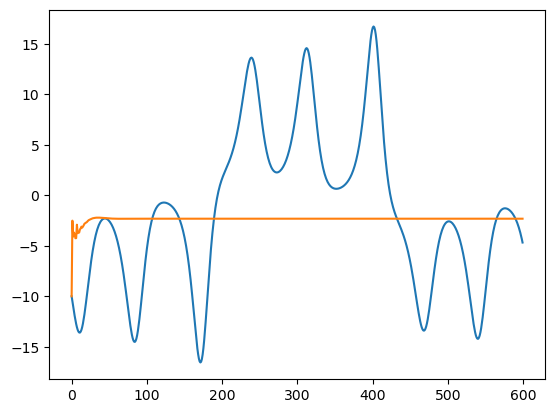

In [105]:
plt.plot(train[:,0].detach().numpy())s
plt.plot(all_train_pred_tensor.detach().numpy().reshape(-1, 3)[:,0])

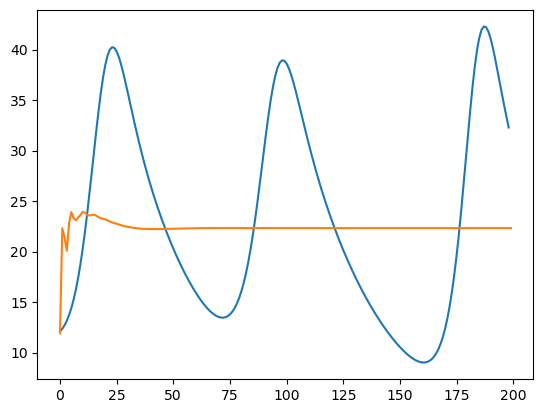

In [106]:
plt.plot(val[1:,2].detach().numpy())
plt.plot(all_val_pred_tensor.detach().numpy().reshape(-1, 3)[:,2])

### Part III: Create dabench model object

In [112]:
class RNN_Model(model.Model):
    def forecast(self, state_vec):
        new_vals, new_hidden = rnn.forward(torch.Tensor(state_vec.xi)[None,:], torch.tensor(state_vec.hidden))
        
        new_vec = vector.StateVector(values = new_vals.detach().numpy())
        new_vec.hidden = new_hidden.detach().numpy()
        
        return new_vec

### Part IV: Forecast and evaluate


In [113]:
state_vec = vector.StateVector(values = np.array(all_val_pred_tensor.detach().numpy().reshape(-1, 3)))


In [114]:
state_vec.hidden = hidden.detach().numpy()

In [115]:
rnn_model = RNN_Model()

In [116]:
new_state_vec = state_vec
state_vec_list = [state_vec]
for i in range(test.shape[0]-1):
    new_state_vec = rnn_model.forecast(new_state_vec)
    state_vec_list.append(new_state_vec)

In [117]:
vals_list = [sv.xi for sv in state_vec_list]

In [118]:
forecast_vals_test = np.array(vals_list)

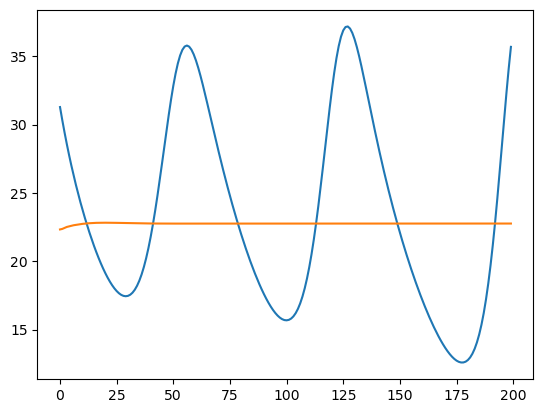

In [119]:
plt.plot(test[:,2].detach().numpy())
plt.plot(forecast_vals_test[:,2])